In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_columns",None)

In [3]:
df=pd.read_csv("house.csv")

In [4]:
df.shape

(1460, 81)

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# In Data Analysis We will Analyze To Find out the below stuff
   1.Missing Values
   2.All The Numerical Variables
   3.Distribution of the Numerical Variables
   4.Categorical Variables
   5.Cardinality of Categorical Variables
   6.Outliers
   7.Relationship between independent and dependent feature(SalePrice)

In [6]:
nan=[x for x in df.columns if df[x].isnull().sum()>1]
for y in nan:
    print(y,":","{}%missing values".format(np.round(df[y].isnull().mean(),decimals=4)))  #total % of missing values

LotFrontage : 0.1774%missing values
Alley : 0.9377%missing values
MasVnrType : 0.0055%missing values
MasVnrArea : 0.0055%missing values
BsmtQual : 0.0253%missing values
BsmtCond : 0.0253%missing values
BsmtExposure : 0.026%missing values
BsmtFinType1 : 0.0253%missing values
BsmtFinType2 : 0.026%missing values
FireplaceQu : 0.4726%missing values
GarageType : 0.0555%missing values
GarageYrBlt : 0.0555%missing values
GarageFinish : 0.0555%missing values
GarageQual : 0.0555%missing values
GarageCond : 0.0555%missing values
PoolQC : 0.9952%missing values
Fence : 0.8075%missing values
MiscFeature : 0.963%missing values


#### Since they are many missing values, we need to find the relationship between missing values and Sales Price

In [7]:
df1=df.copy()

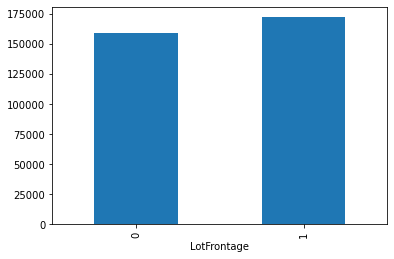

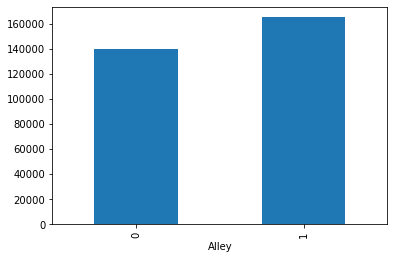

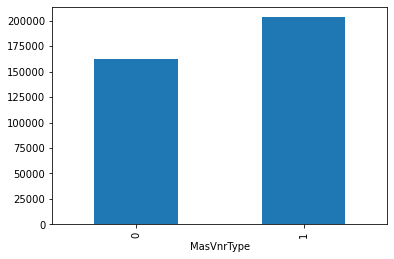

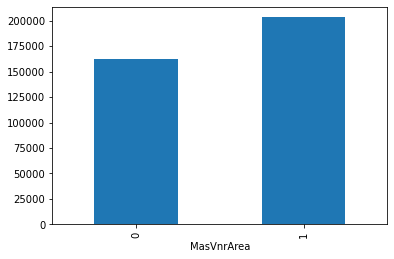

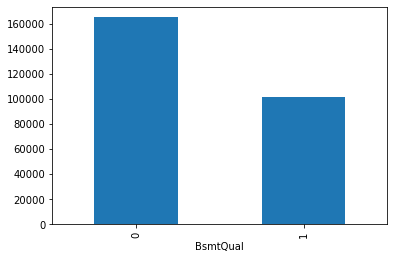

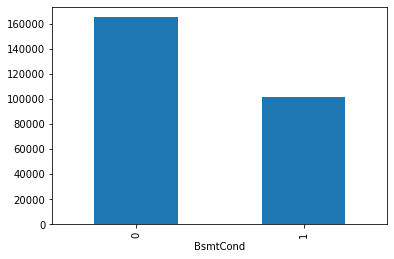

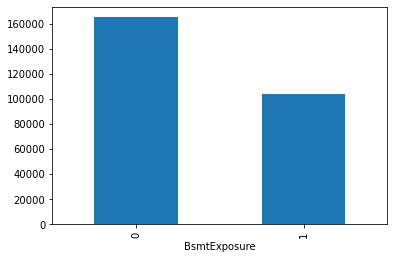

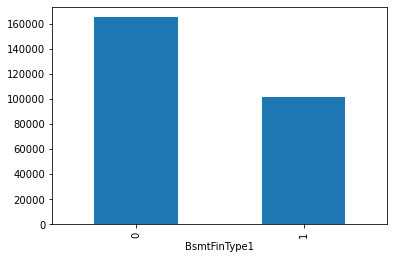

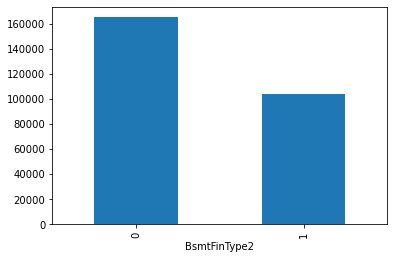

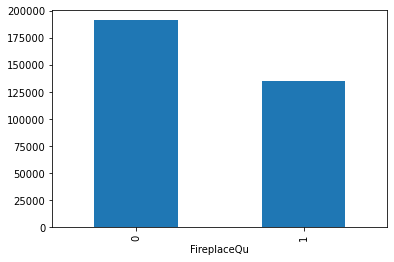

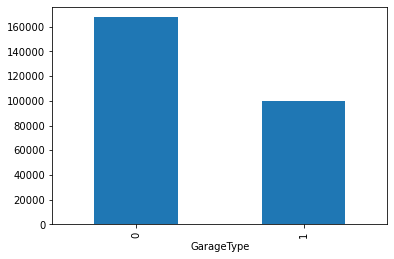

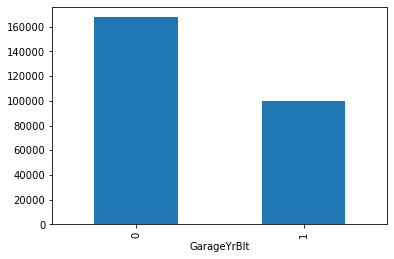

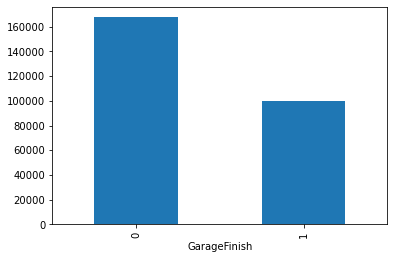

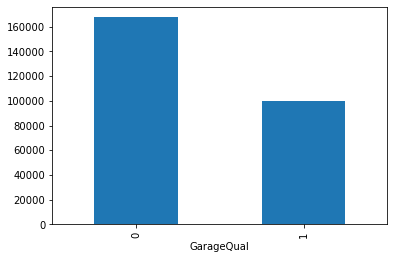

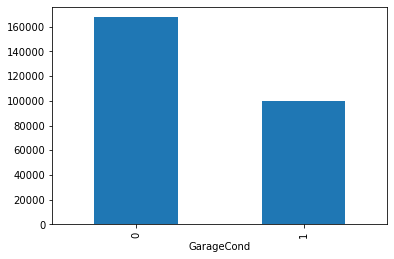

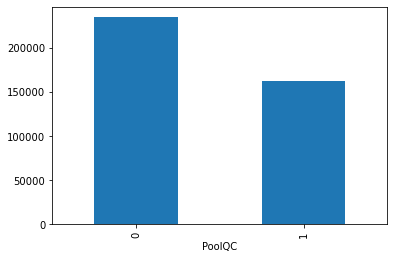

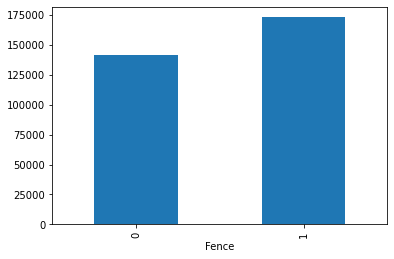

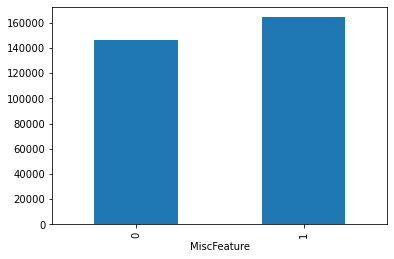

In [9]:
for i2 in nan:
    df1=df.copy()
    df1[i2]=np.where(df1[i2].isnull()==True,1,0)
    df1.groupby(i2)["SalePrice"].median().plot(kind="bar")   #THERE IS SUSTAINABLE RELATIONSHIP BETWEEN NULL VALUES AND THE OUTPUT
    plt.show()

#### Temporal Variables(Eg: Datetime Variables)

In [9]:
date=[i for i in df.columns if i[0:2]=="Yr" or i[0:4]=="Year" or "Yr" in i]  #to grt get all date columns

In [10]:
date

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

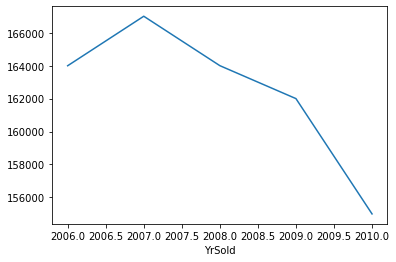

In [11]:
df.groupby("YrSold")["SalePrice"].median().plot()  #as year increase saleprice decrease

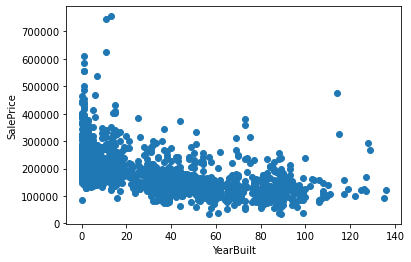

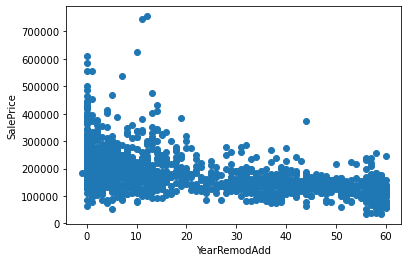

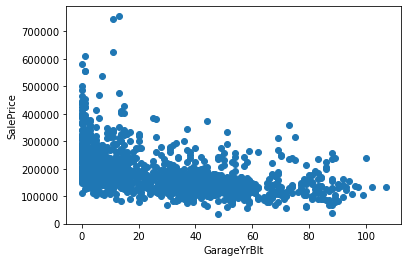

In [12]:
for x in date:
    df3=df.copy()
    if x!="YrSold":
        df3[x]=df3["YrSold"]-df3[x]
        plt.scatter(df3[x],df3["SalePrice"])
        plt.ylabel("SalePrice")
        plt.xlabel(x)
        plt.show()

#### delaying withe numerical variables

In [13]:
numerical=[x for x in df.columns if df[x].dtype!="O" and df[x].nunique()<25 and x not in date and x not in df["Id"]] #descreate numerical values

In [14]:
numerical

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [15]:
len(numerical)

17

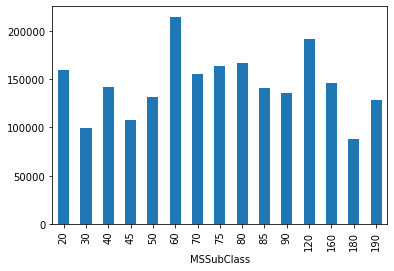

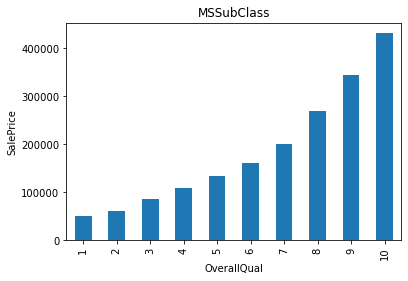

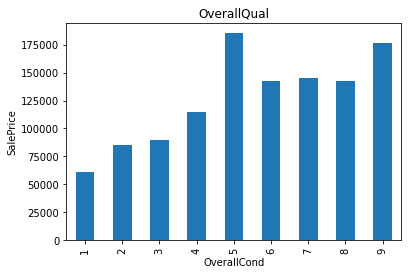

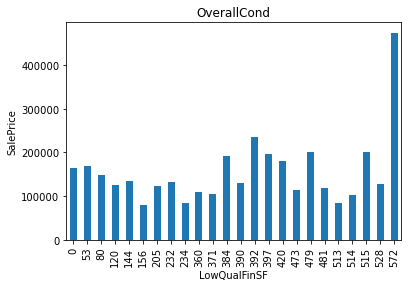

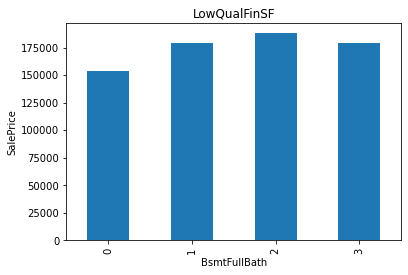

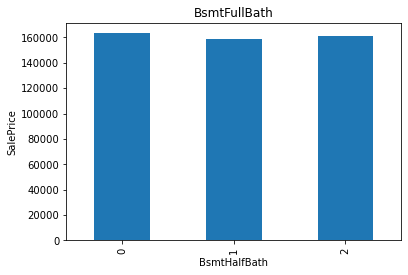

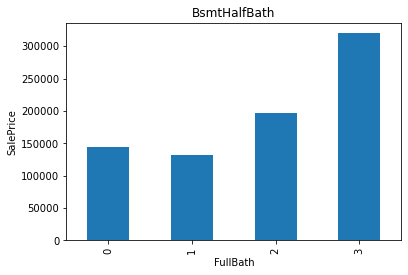

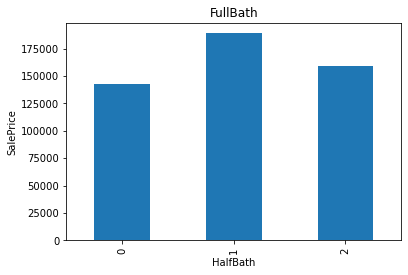

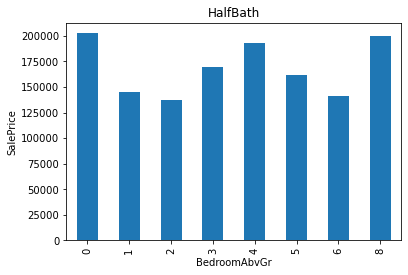

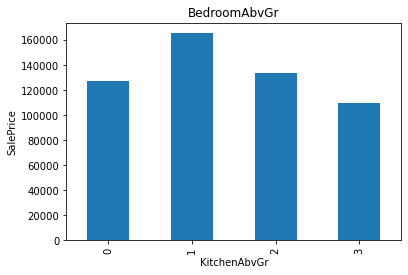

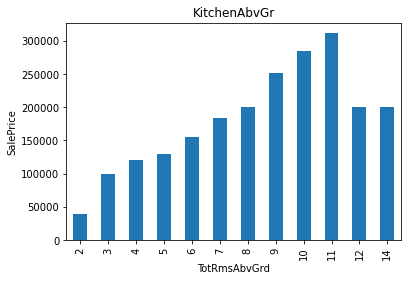

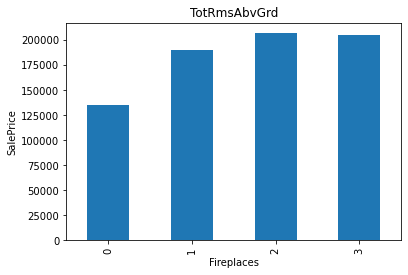

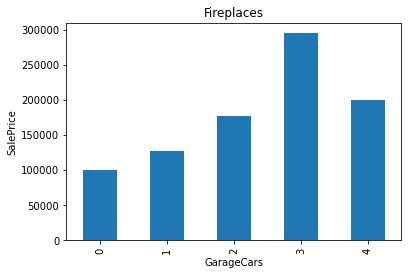

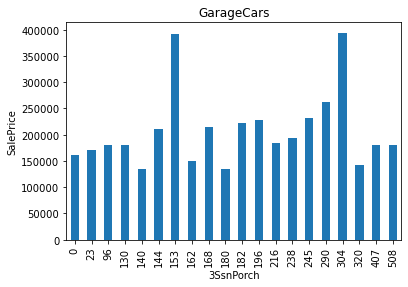

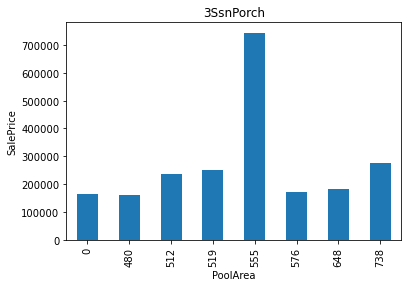

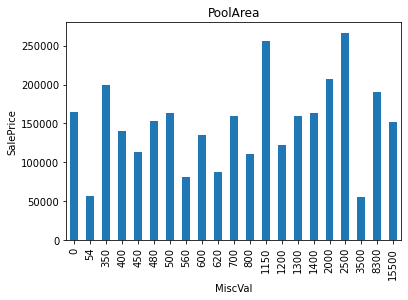

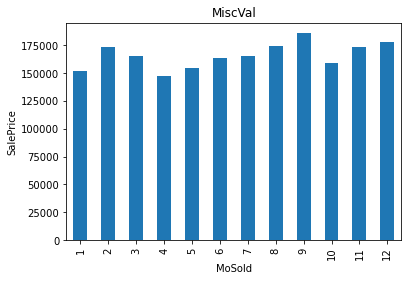

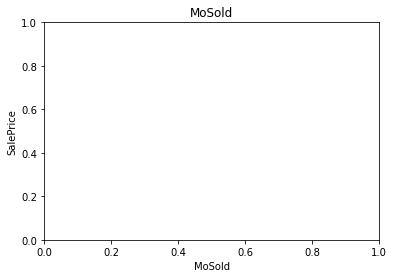

In [16]:
for i in numerical:
    df.groupby(i)["SalePrice"].median().plot(kind="bar")
    plt.show()
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.title(i)

### Continuous Variable

In [17]:
con_numerical=[x for x in df.columns if df[x].dtype!="O" and df[x].nunique()>=25 and x not in date+["Id"]]

In [18]:
con_numerical

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

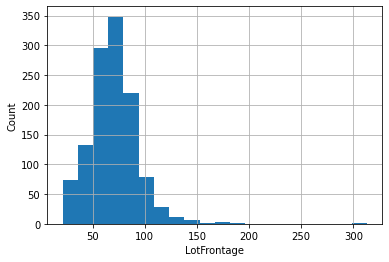

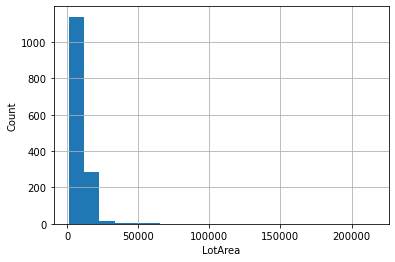

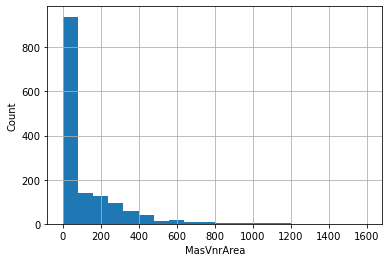

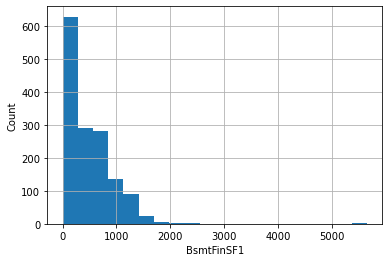

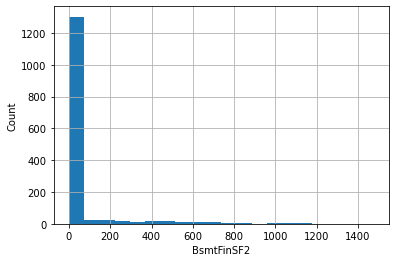

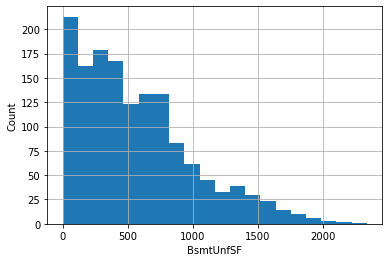

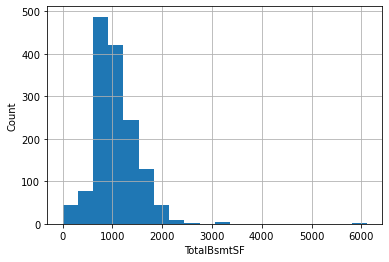

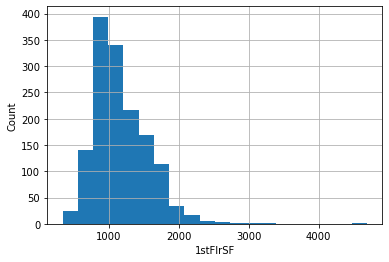

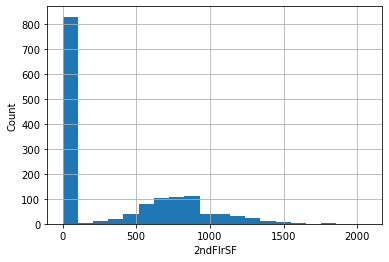

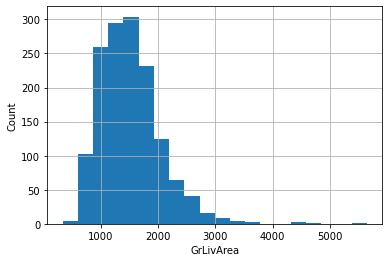

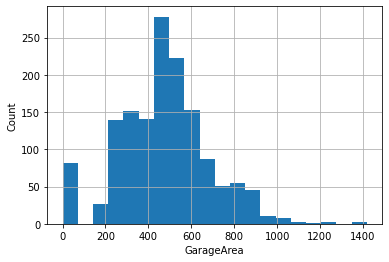

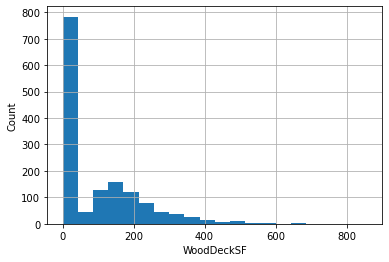

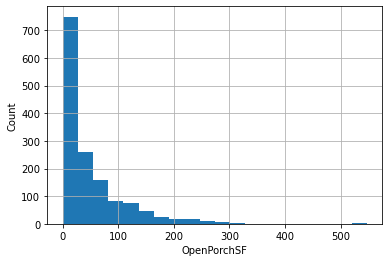

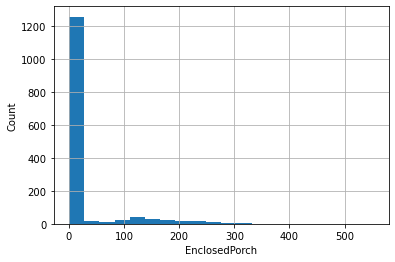

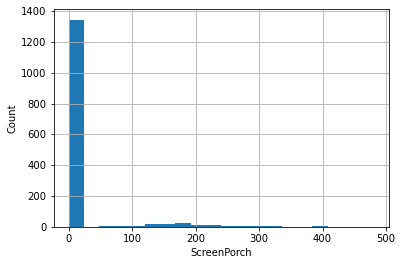

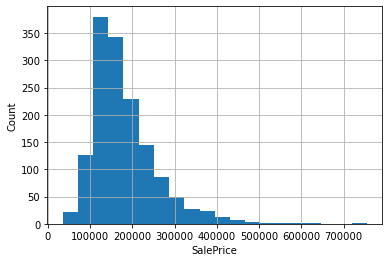

In [19]:
for i in con_numerical:
    df[i].hist(bins=20)
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.show()

#### there is some skewness in our data

### Log normal distribution

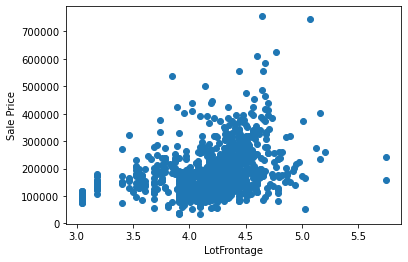

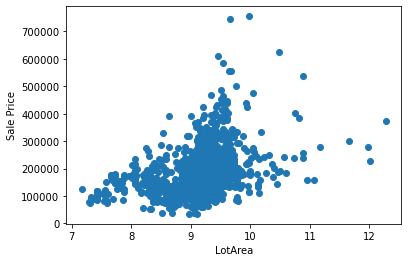

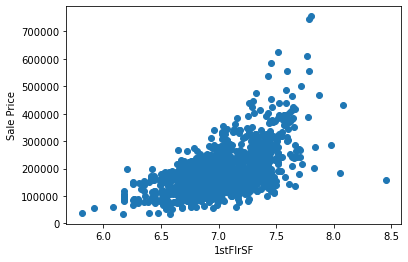

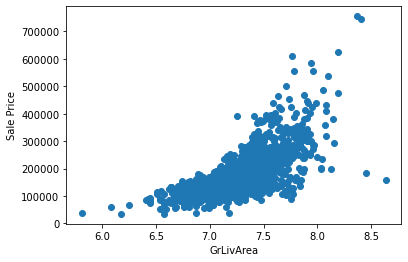

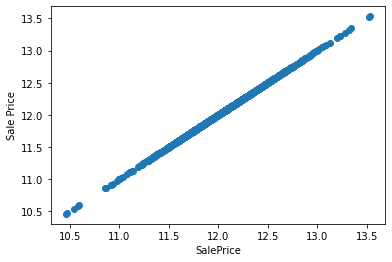

In [20]:
for i in con_numerical:
    df4=df.copy()
    if 0 in df[i].unique():
        pass
    else:
        df4[i]=np.log(df4[i])
        plt.scatter(df4[i],df4['SalePrice'])
        plt.xlabel(i)
        plt.ylabel("Sale Price")
        plt.show()

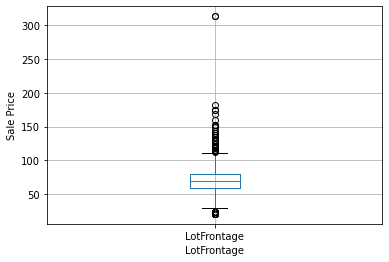

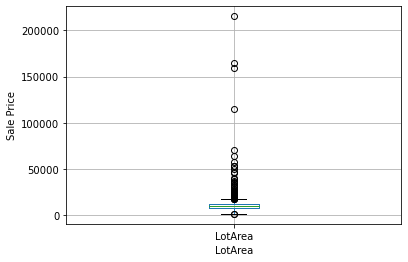

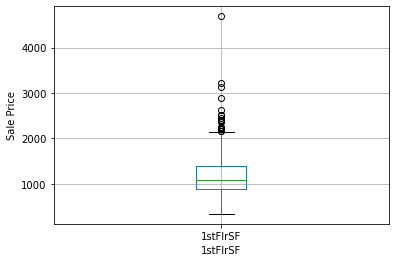

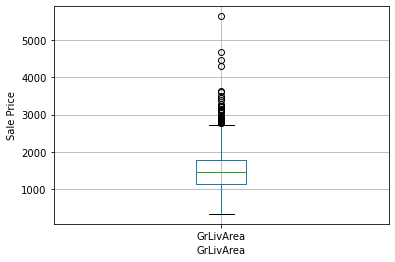

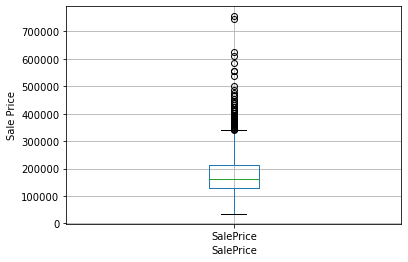

In [21]:
for i in con_numerical:
    df4=df.copy()
    if 0 in df[i].unique():
        pass
    else:
        df4.boxplot(column= i)
        plt.xlabel(i)
        plt.ylabel("Sale Price")
        plt.show()

### Categorical Variables¶

In [22]:
categorical=[ i for i in df.columns if df[i].dtypes=="O"]

In [23]:
categorical

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [24]:
for i in categorical:
    print("The feature is {} and the unique variables is {}".format(i,df[i].nunique()))

The feature is MSZoning and the unique variables is 5
The feature is Street and the unique variables is 2
The feature is Alley and the unique variables is 2
The feature is LotShape and the unique variables is 4
The feature is LandContour and the unique variables is 4
The feature is Utilities and the unique variables is 2
The feature is LotConfig and the unique variables is 5
The feature is LandSlope and the unique variables is 3
The feature is Neighborhood and the unique variables is 25
The feature is Condition1 and the unique variables is 9
The feature is Condition2 and the unique variables is 8
The feature is BldgType and the unique variables is 5
The feature is HouseStyle and the unique variables is 8
The feature is RoofStyle and the unique variables is 6
The feature is RoofMatl and the unique variables is 8
The feature is Exterior1st and the unique variables is 15
The feature is Exterior2nd and the unique variables is 16
The feature is MasVnrType and the unique variables is 4
The f

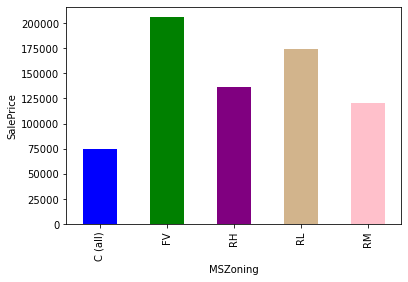

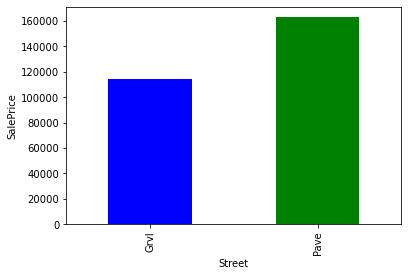

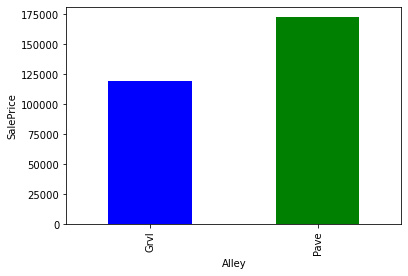

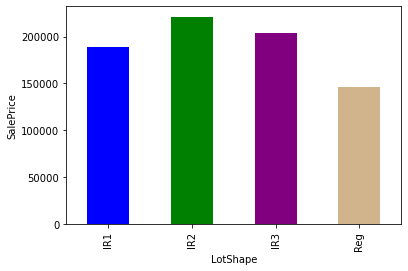

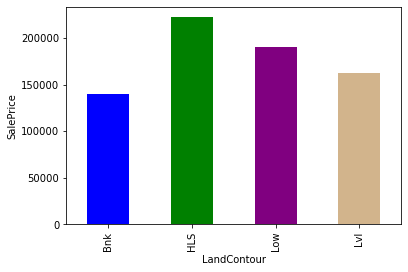

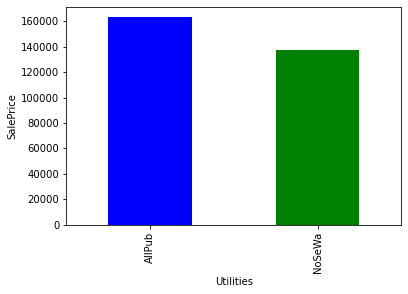

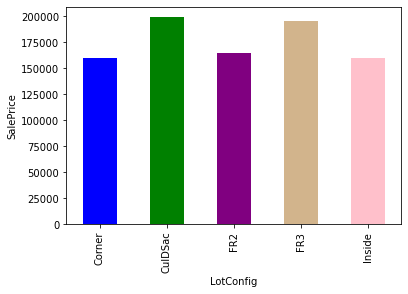

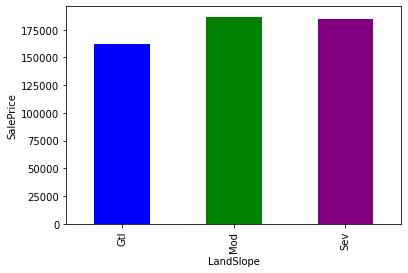

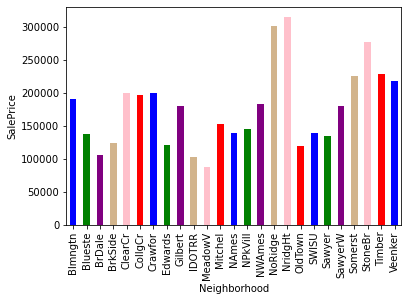

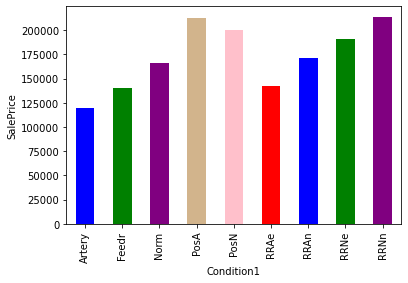

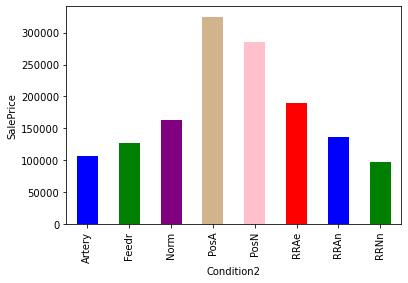

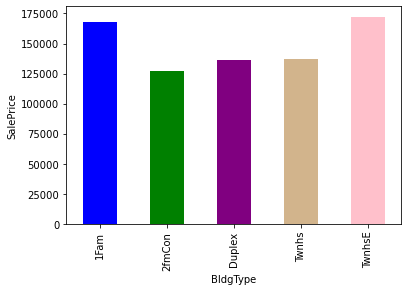

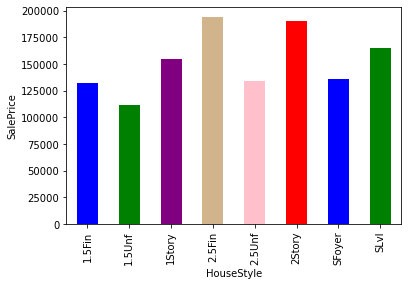

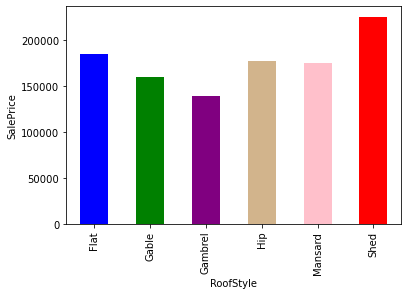

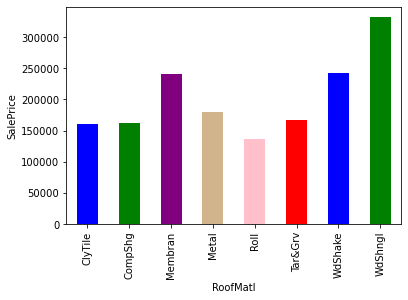

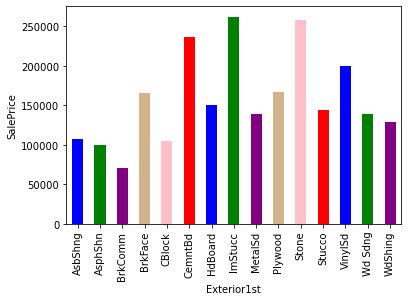

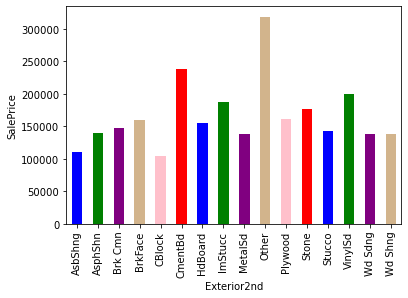

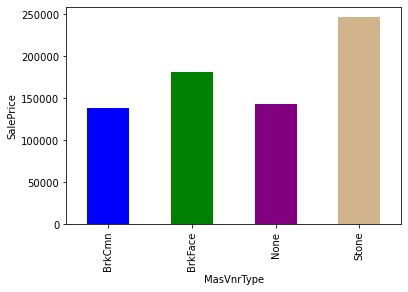

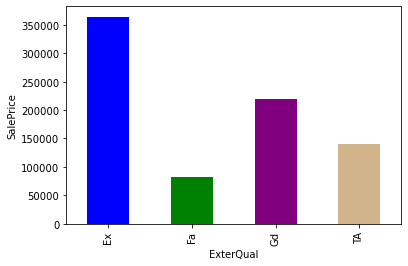

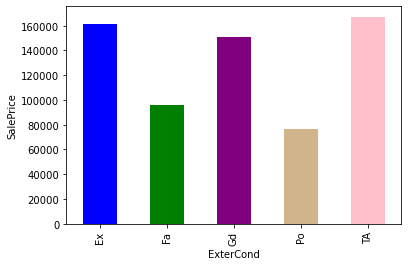

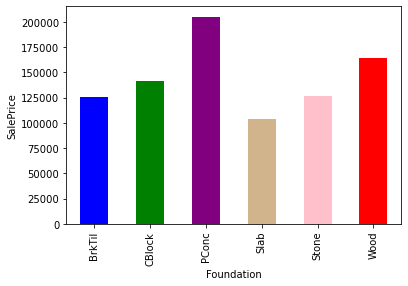

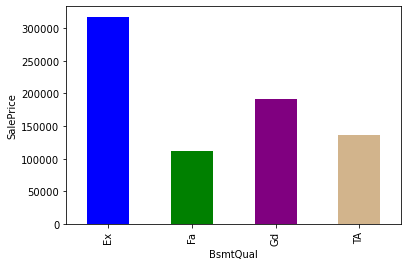

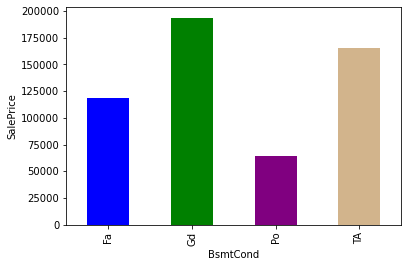

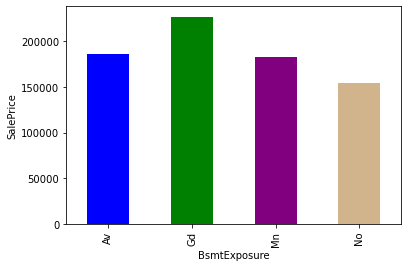

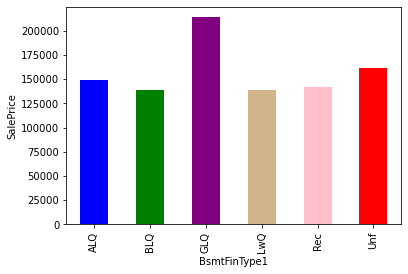

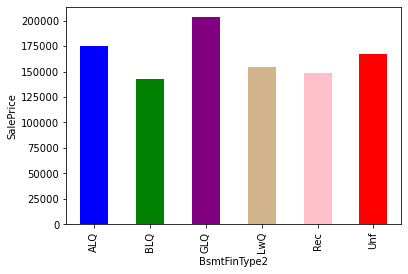

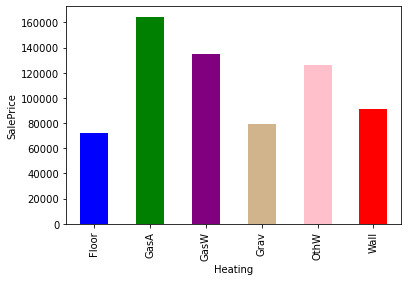

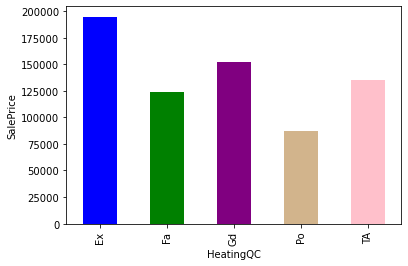

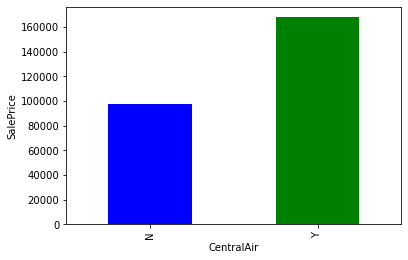

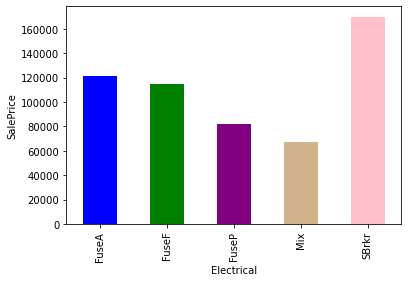

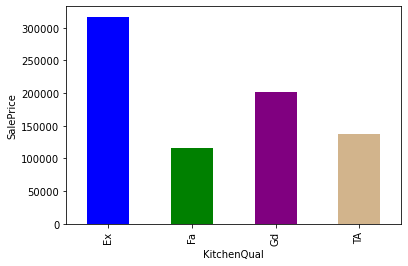

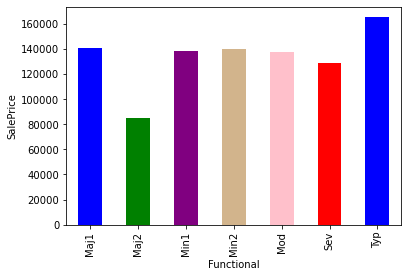

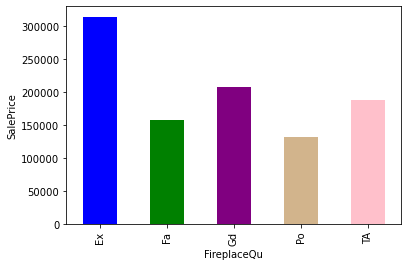

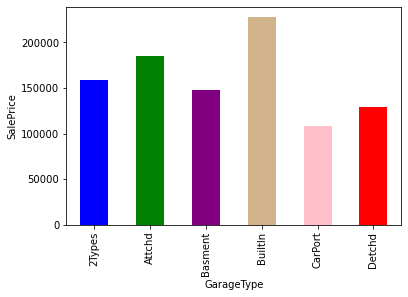

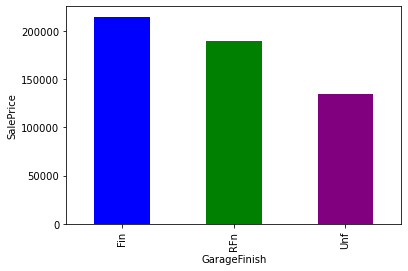

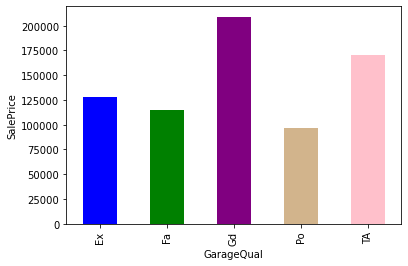

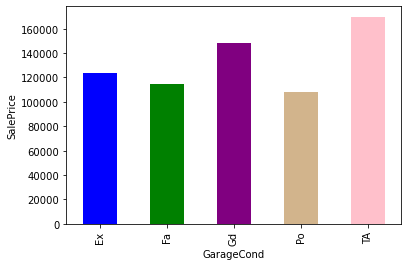

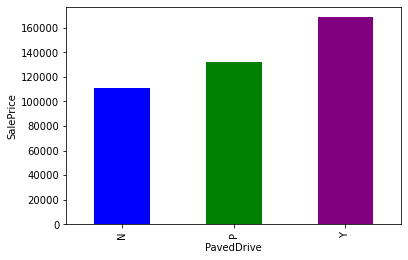

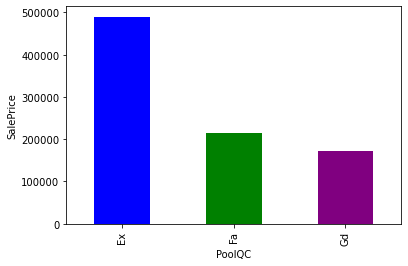

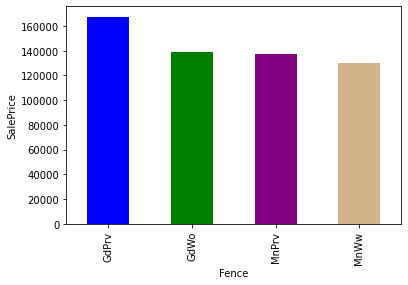

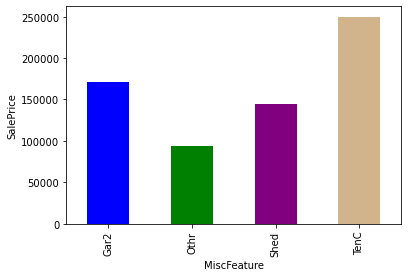

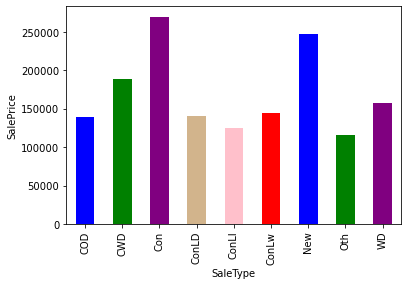

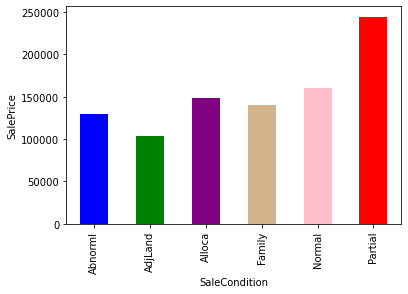

In [25]:
for i in categorical:
    df5=df.copy()
    df5.groupby(i)["SalePrice"].median().plot(kind="bar",color= ['blue', 'green', 'purple', 'tan', 'pink', 'red'])
    plt.xlabel(i)
    plt.ylabel("SalePrice")
    plt.show()

### feature engineering

#### handling missing values

In [26]:
nan_values=[i for i in df.columns if df[i].dtypes!="O" and df[i].isnull().sum()>=1]

In [27]:
def fun(i,df):
      nan1=df[i].dropna().sample(df[i].isnull().sum(),random_state=0)
      nan1.index=df.loc[df[i].isnull()==True,[i]].index
      df.loc[df[i].isnull()==True,[i]]=nan1

In [28]:
for i in nan_values: 
  fun(i,df)

#### handling missing values foe catagorecal values

In [29]:
nan_cat=[x for x in df.columns if df[x].dtypes=="O" and df[x].isnull().sum()>=1]

In [30]:
nan_cat

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [31]:
for i in nan_cat:
    df[i]=df[i].fillna("missing")

In [32]:
df[nan_cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Alley         1460 non-null   object
 1   MasVnrType    1460 non-null   object
 2   BsmtQual      1460 non-null   object
 3   BsmtCond      1460 non-null   object
 4   BsmtExposure  1460 non-null   object
 5   BsmtFinType1  1460 non-null   object
 6   BsmtFinType2  1460 non-null   object
 7   Electrical    1460 non-null   object
 8   FireplaceQu   1460 non-null   object
 9   GarageType    1460 non-null   object
 10  GarageFinish  1460 non-null   object
 11  GarageQual    1460 non-null   object
 12  GarageCond    1460 non-null   object
 13  PoolQC        1460 non-null   object
 14  Fence         1460 non-null   object
 15  MiscFeature   1460 non-null   object
dtypes: object(16)
memory usage: 182.6+ KB


### normalising our data

In [33]:
conti=[x for x in df.columns if df[x].nunique()>25 and df[x].dtypes!="O" and x not in ["Id"]]

In [34]:
for i in conti:
    if 0 in df[i].unique():
          pass
    else:
        df[i]=np.log(df[i])

#### Feature Scaling

In [35]:
scale=[x for x in df.columns if x not in ["Id","SalePrice"] and df[x].dtypes!="O"]

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[scale])

MinMaxScaler()

In [37]:
scaler.transform(df[scale])

array([[0.23529412, 0.41820812, 0.3663439 , ..., 0.        , 0.09090909,
        0.5       ],
       [0.        , 0.49506375, 0.39131677, ..., 0.        , 0.36363636,
        0.25      ],
       [0.23529412, 0.434909  , 0.4223585 , ..., 0.        , 0.72727273,
        0.5       ],
       ...,
       [0.29411765, 0.42385922, 0.37959669, ..., 0.16129032, 0.36363636,
        1.        ],
       [0.        , 0.434909  , 0.39368765, ..., 0.        , 0.27272727,
        1.        ],
       [0.        , 0.47117546, 0.39806941, ..., 0.        , 0.45454545,
        0.5       ]])

In [38]:
df.shape

(1460, 81)

In [39]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,4.174387,9.041922,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7.602401,7.602401,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,missing,Attchd,7.602401,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,missing,missing,missing,0,2,2008,WD,Normal,12.247694
1,2,20,RL,4.382027,9.169518,Pave,missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,7.588830,7.588830,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,7.588830,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,missing,missing,missing,0,5,2007,WD,Normal,12.109011
2,3,60,RL,4.219508,9.328123,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7.601402,7.601902,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.601402,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,missing,missing,missing,0,9,2008,WD,Normal,12.317167
3,4,70,RL,4.094345,9.164296,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,7.557473,7.585789,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,7.599902,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,missing,missing,missing,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,4.430817,9.565214,Pave,missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,7.600902,7.600902,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,7.600902,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,missing,missing,missing,0,12,2008,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,4.127134,8.976768,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,7.600402,7.600902,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,6.859615,694,0,7.406711,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,7.600402,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,missing,missing,missing,0,8,2007,WD,Normal,12.072541
1456,1457,20,RL,4.442651,9.486076,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,7.589842,7.594884,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,7.636752,0,0,7.636752,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,7.589842,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,missing,MnPrv,missing,0,2,2010,WD,Normal,12.254863
1457,1458,70,RL,4.189655,9.109636,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,7.570959,7.603898,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,

### outlayer detection

In [40]:
out=[x for x in df.columns if df[x].dtypes!="O" and x not in ["Id","SalePrice"] and df[x].nunique()>25 and 0 not in df[x].unique()]

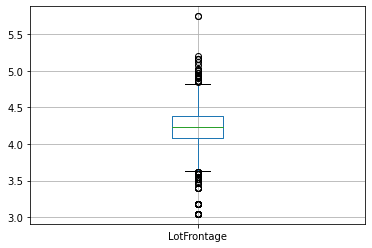

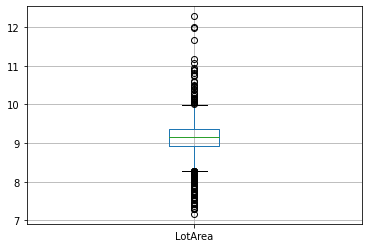

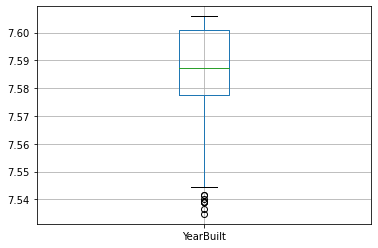

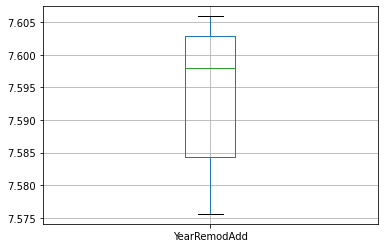

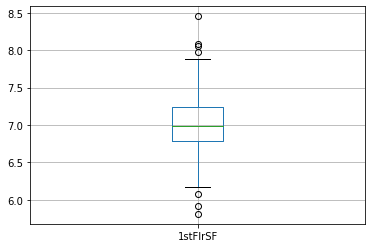

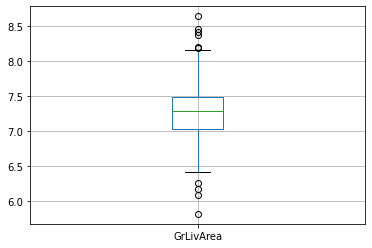

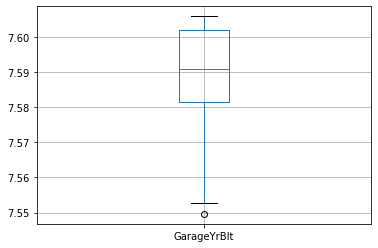

In [41]:
for i in out:
    df.boxplot(column=i)
    plt.show()

In [42]:
for i in out:
    IQR=df[i].quantile(0.75)-df[i].quantile(0.25)
    lower_bridge=df[i].quantile(0.25)-(IQR*3)
    upper_bridge=df[i].quantile(0.75)+(IQR*3)
    print(lower_bridge), print(upper_bridge)
    df.loc[df[i]>upper_bridge,[i]]=upper_bridge
    df.loc[df[i]<lower_bridge,[i]]=lower_bridge

3.164069871601235
5.295494206978366
7.642394150704867
10.646261281486188
7.507827951784664
7.670708340360146
7.528357886941969
7.658807393651845
5.414894661528644
8.605255248644323
5.670497573435522
8.841573332939314
7.520662866946774
7.66283127957146


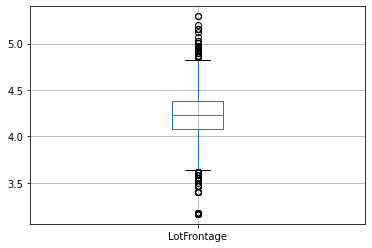

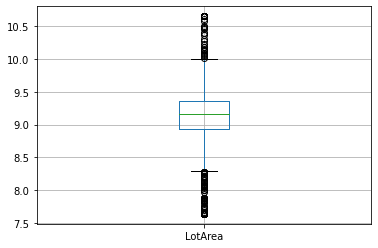

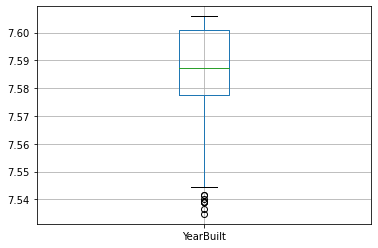

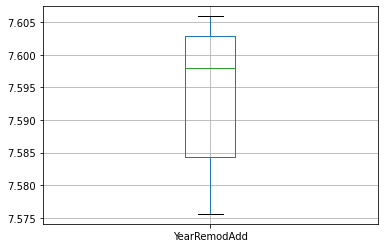

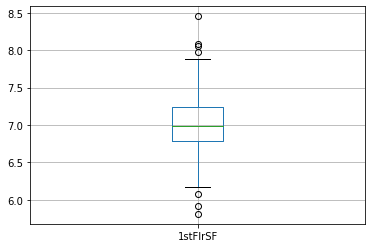

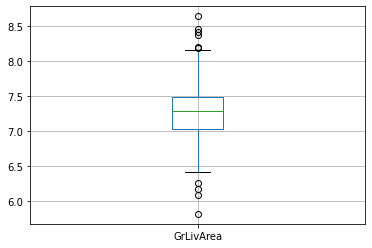

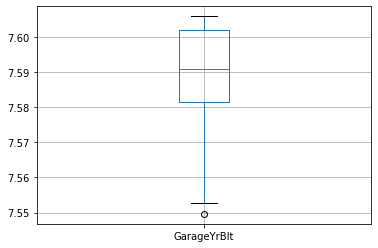

In [43]:
for i in out:
    df.boxplot(column=i)
    plt.show()

### one hot encoding

In [44]:
one=[x for x in df.columns if df[x].dtypes=="O"]

In [45]:
df1=df[one].copy()

In [46]:
df1.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [47]:
for i in one:
    print(df[i].unique())

['RL' 'RM' 'C (all)' 'FV' 'RH']
['Pave' 'Grvl']
['missing' 'Grvl' 'Pave']
['Reg' 'IR1' 'IR2' 'IR3']
['Lvl' 'Bnk' 'Low' 'HLS']
['AllPub' 'NoSeWa']
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
['Gtl' 'Mod' 'Sev']
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
['VinylSd' 'MetalSd' 'W

In [48]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder() 
for i in df1.columns:
    df[i]=label_encoder.fit_transform(df[i])
  

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int32  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   int32  
 6   Alley          1460 non-null   int32  
 7   LotShape       1460 non-null   int32  
 8   LandContour    1460 non-null   int32  
 9   Utilities      1460 non-null   int32  
 10  LotConfig      1460 non-null   int32  
 11  LandSlope      1460 non-null   int32  
 12  Neighborhood   1460 non-null   int32  
 13  Condition1     1460 non-null   int32  
 14  Condition2     1460 non-null   int32  
 15  BldgType       1460 non-null   int32  
 16  HouseStyle     1460 non-null   int32  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [50]:
from sklearn.linear_model import Lasso,LassoCV
from sklearn.feature_selection import SelectFromModel

In [51]:
x_train=df.drop(columns=["Id","SalePrice"],axis=1)

In [52]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()

X_scaled = scaler.fit_transform(x_train)

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables =X_scaled
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = x_train.columns

C:\Users\kisho\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [54]:
vif.sort_values(ascending=False,by='VIF')   # THER IS SOME MULTICOLINEARITY 

,VIF,Features
37,inf,TotalBsmtSF
36,inf,BsmtUnfSF
35,inf,BsmtFinSF2
33,inf,BsmtFinSF1
45,26.793488,GrLivArea
...,...,...
8,1.107680,Utilities
13,1.105649,Condition2
76,1.100902,YrSold
75,1.085660,MoSold


### lasso to reduce multicollinearity

In [55]:
y_train=df.loc[0:,["SalePrice"]]

In [56]:
lasscv = LassoCV(alphas =None,cv =5, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

C:\Users\kisho\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LassoCV(cv=5, max_iter=100000, normalize=True)

In [57]:
alpha1 = lasscv.alpha_
alpha1

0.00012105269854295416

In [58]:
feature_sel_model = SelectFromModel(Lasso(alpha=alpha1, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.00012105269854295416, random_state=0))

In [59]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [60]:
selected_feat = x_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
   np.sum(sel_.estimator_.coef_ == 0)))

total features: 79
selected features: 74


In [61]:
selected_feat

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'Poo

In [62]:
x_train[selected_feat]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,4.174387,9.041922,1,2,3,3,0,4,0,5,2,2,0,5,7,5,7.602401,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,1,0,1,4,6.752270,854,7.444249,1,0,2,1,3,1,2,8,6,0,5,1,1,2,548,4,4,2,0,61,0,0,0,0,3,4,4,0,2,2008,8,4
1,20,3,4.382027,9.169518,1,2,3,3,0,2,0,24,1,2,0,2,6,8,7.588830,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,1,0,1,4,7.140453,0,7.140453,0,1,2,0,3,1,3,6,6,1,4,1,1,2,460,4,4,2,298,0,0,0,0,0,3,4,4,0,5,2007,8,4
2,60,3,4.219508,9.328123,1,2,0,3,0,4,0,5,2,2,0,5,7,5,7.601402,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,1,0,1,4,6.824374,866,7.487734,1,0,2,1,3,1,2,6,6,1,4,1,1,2,608,4,4,2,0,42,0,0,0,0,3,4,4,0,9,2008,8,4
3,70,3,4.094345,9.164296,1,2,0,3,0,0,0,6,2,2,0,5,7,5,7.557473,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,1,2,1,4,6.867974,756,7.448334,1,0,1,0,3,1,2,7,6,1,2,5,2,3,642,4,4,2,0,35,272,0,0,0,3,4,4,0,2,2006,8,0
4,60,3,4.430817,9.565214,1,2,0,3,0,2,0,15,2,2,0,5,8,5,7.600902,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,1,0,1,4,7.043160,1053,7.695303,1,0,2,1,4,1,2,9,6,1,4,1,1,3,836,4,4,2,192,84,0,0,0,0,3,4,4,0,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,4.127134,8.976768,1,2,3,3,0,4,0,8,2,2,0,5,6,5,7.600402,1,1,12,13,2,0.0,3,4,2,2,3,3,5,0,5,0,1,0,1,4,6.859615,694,7.406711,0,0,2,1,3,1,3,7,6,1,4,1,1,2,460,4,4,2,0,40,0,0,0,0,3,4,4,0,8,2007,8,4
1456,20,3,4.442651,9.486076,1,2,3,3,0,4,0,14,2,2,0,2,6,6,7.589842,1,1,9,10,3,119.0,3,4,1,2,3,3,0,790,4,163,1,4,1,4,7.636752,0,7.636752,1,0,2,0,3,1,3,7,2,2,4,1,2,2,500,4,4,2,349,0,0,0,0,0,3,2,4,0,2,2010,8,4
1457,70,3,4.189655,9.109636,1,2,3,3,0,4,0,6,2,2,0,5,7,9,7.570959,1,1,5,5,2,0.0,0,2,4,3,1,3,2,275,5,0,1,0,1,4,7.080026,1152,7.757906,0,0,2,0,4,1,2,9,6,2,2,1,1,1,252,4,4,2,0,60,0,0,0,0,3,0,2,2500,5,2010,8,4
1458,20,3,4.219508,9.181632,1,2,3,3,0,4,0,12,2,2,0,2,5,6,7.575585,3,1,8,8,2,0.0,3,4,1,3,3,2,2,49,4,1029,1,2,1,0,6.982863,0,6.982863,1,0,1,0,2,1,2,5,6,0,5,1,2,1,240,4,4,2,366,0,112,0,0,0,3,4,4,0,4,2010,8,4


In [63]:
df8=x_train[selected_feat]

In [64]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(df8)

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables =X_scaled
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = df8.columns

In [66]:
vif

,VIF,Features
0,5.587635,MSSubClass
1,1.333674,MSZoning
2,2.028734,LotFrontage
3,3.042174,LotArea
4,1.160633,Street
...,...,...
69,1.621682,MiscVal
70,1.081925,MoSold
71,1.094475,YrSold
72,1.154589,SaleType


### PCA

In [67]:
X_scaled

array([[ 0.07337496, -0.04553194, -0.05400597, ...,  0.13877749,
         0.31386709,  0.2085023 ],
       [-0.87256276, -0.04553194,  0.56433135, ..., -0.61443862,
         0.31386709,  0.2085023 ],
       [ 0.07337496, -0.04553194,  0.08035993, ...,  0.13877749,
         0.31386709,  0.2085023 ],
       ...,
       [ 0.30985939, -0.04553194, -0.00854037, ...,  1.64520971,
         0.31386709,  0.2085023 ],
       [-0.87256276, -0.04553194,  0.08035993, ...,  1.64520971,
         0.31386709,  0.2085023 ],
       [-0.87256276, -0.04553194,  0.37213959, ...,  0.13877749,
         0.31386709,  0.2085023 ]])

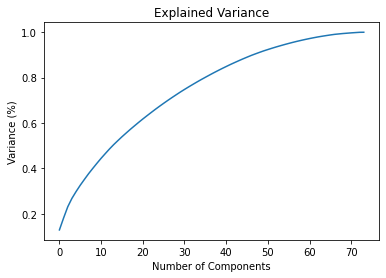

In [68]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(X_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [69]:
col=[]
for i in range(1,37):
  i=str(i)
  col.append("PCA_"+i)
pca = PCA(n_components=36)
new_data = pca.fit_transform(X_scaled)
  # This will be the new data fed to the algorithm.
principal_Df = pd.DataFrame(data = new_data
             , columns =col)

In [70]:
principal_Df

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14,PCA_15,PCA_16,PCA_17,PCA_18,PCA_19,PCA_20,PCA_21,PCA_22,PCA_23,PCA_24,PCA_25,PCA_26,PCA_27,PCA_28,PCA_29,PCA_30,PCA_31,PCA_32,PCA_33,PCA_34,PCA_35,PCA_36
0,1.972538,0.010954,-1.898550,0.251969,-1.455506,0.416416,0.897859,0.247836,0.081512,0.070257,0.468874,-0.673415,-1.660972,0.563328,1.682049,-0.411389,-0.112317,0.496778,-0.307805,0.682777,0.100163,0.496143,0.873494,0.730665,0.335119,-1.009409,-0.061785,-0.789767,0.650650,0.152642,0.193541,0.665059,0.369427,0.208301,-0.460797,0.245231
1,0.452647,-1.318875,1.842146,0.474736,-0.491851,-0.003051,-0.799939,-0.010033,0.479901,-0.932503,-0.505473,0.339149,-0.455898,0.503287,-2.364425,0.620373,-0.303583,0.329014,1.743845,0.459311,-0.264736,3.452449,-0.278470,-1.404351,-0.248698,0.740899,0.459867,-0.150915,-0.816352,-1.115434,-0.303676,0.528717,0.029783,-1.375907,-0.581092,-0.532640
2,2.575716,-0.119326,-1.145067,0.174699,-1.463538,0.644631,0.790542,-0.439930,0.118534,-0.417634,0.876262,-0.461119,-0.472424,0.489503,0.980376,0.143952,0.200406,-0.620339,0.002472,-0.480497,0.647263,0.059670,0.035630,0.653656,0.524864,-0.499059,-0.131049,-0.167130,0.231052,0.613388,-0.610152,0.338706,-0.627259,0.703035,0.518830,0.053262
3,-0.812246,1.867780,1.192961,0.254771,0.585784,2.424788,0.120103,-0.196441,-0.824271,-0.637087,0.354279,0.193017,-1.054497,1.954157,-0.376563,-0.358909,2.142219,0.903595,-1.262361,-3.188495,1.818550,-0.534821,0.039340,-1.012631,-1.019377,-1.634829,0.164254,-1.896634,-0.047441,-1.552270,0.370404,0.503534,0.230379,0.431043,0.730924,-0.386761
4,5.033707,1.179926,-0.339245,0.679452,-1.027392,0.148630,0.571281,-0.678654,-0.052320,0.018089,1.044630,-0.407238,-1.450220,1.259741,-0.100315,0.354152,-0.140398,-0.754515,0.484508,-0.771557,0.401219,-0.368447,-0.467539,0.353706,0.449858,0.551493,0.226211,-0.189676,-0.546930,0.862365,-0.934963,0.209177,-0.203545,0.530638,0.882738,-0.464158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.798746,0.931561,-2.119786,-0.488117,-2.208809,0.377837,0.310863,0.224249,-0.530435,-0.056867,0.426748,-0.632286,0.683740,-0.653684,0.070050,-0.382354,0.143982,-0.970777,-0.116830,-0.253624,0.013277,0.468756,0.096145,0.059818,0.548646,-0.453234,-0.042117,-0.172476,-0.042654,0.042734,0.490042,-0.179853,-0.293710,0.601603,0.096774,0.089947
1456,0.865894,-0.485108,3.310180,0.808108,0.654522,-0.896336,0.077181,-0.549133,-0.774459,0.917607,-1.489586,-1.499193,-1.147426,-2.809423,-0.007295,-0.705506,1.702996,1.186938,-1.198771,-0.018122,-2.032358,1.436495,0.673973,0.530818,-1.015792,0.068450,1.062080,0.661303,-1.158135,0.150151,0.557104,-0.332552,0.603779,-0.560147,0.105225,-0.245968
1457,1.489128,2.595481,0.222763,1.928406,-0.485847,0.414250,0.157282,0.008576,6.819392,2.007557,-2.622992,1.324860,1.825903,-1.286238,-0.280036,2.229667,1.363642,0.856011,-1.956847,0.593100,-1.188149,1.339971,-0.703647,-0.191230,2.958275,-0.754278,0.208266,0.325874,1.988984,1.668848,0.629884,-0.042098,0.666025,0.499800,-0.476172,1.458681
1458,-2.796628,-1.821053,2.742820,0.261664,0.662407,0.252996,-0.208242,-0.572102,-1.962623,2.644300,-1.808332,0.310930,-0.273357,-1.199730,2.260769,0.317252,-1.474501,0.988311,0.657206,-0.696200,0.235575,0.275812,0.207593,0.313897,1.095596,1.593471,-1.240636,0.917143,1.317522,-0.756687,-0.129851,0.674568,1.070102,1.002045,0.700818,0.568876


In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables =new_data
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = principal_Df.columns

In [72]:
vif     #our vif has been reduced

,VIF,Features
0,1.0,PCA_1
1,1.0,PCA_2
2,1.0,PCA_3
3,1.0,PCA_4
4,1.0,PCA_5
5,1.0,PCA_6
6,1.0,PCA_7
7,1.0,PCA_8
8,1.0,PCA_9
9,1.0,PCA_10
